# EDA SUR FAST FASHION
## SOYKOK Aylin - CELIK Simay


Nous avons scrapé des données sur les vêtements de la marque H&M qui est un des leaders du marché de la mode éphémère. A partir de leur site Internet, nous avons le type de produit, le nom, le prix, les matériaux, le url et les pays de fabrication de chaque item. A partir de ces informations, nous voulons faire des analyse sur la mode éphémère, la comparer avec la mode durable et voir s'il est possible de classifier un item selon ses caractéristiques. 

Dans ce notebook nous alons :
    - nettoyer les données : Au cours de scraping, nous avons ignoré les problèmes (par exemple ne pas pouvoir accéder à un element h1) afin d'obtenir des nombreuses données. Donc nous devons maintenant les netoyyer et supprimer les NA.Plus spécifiquement, nous avons sauvegardé le paragraphe décrivant les pays de fabrication en entier donc nous devons les extraire efficacement.

    -Faire des analyse sur les prix, les matériaux les plus utilisés et leurs effets climatiques.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# chargement des données
df_jeans = pd.read_csv('../data/hmJEANS.csv')
df_tops = pd.read_csv('../data/hmTOPS.csv')
df_pantalons = pd.read_csv('../data/hmPANTALONS.csv')
df_sweatshirts = pd.read_csv('../data/hmSWEATSHIRTS.csv')

#les types de produits sont définis donc nous pouvons les concatener pour simplifier la vie
df = pd.concat([df_jeans, df_tops, df_pantalons, df_sweatshirts]) 



In [3]:
df.head()

,Product Type,Product Name,Price,Material,Link,Informations
0,Jeans,Pantalon cargo en denim,"29,99 €","[' Coton', ' Coton recyclé']",https://www2.hm.com/fr_fr/productpage.11989210...,['Pays de fabrication\nBangladesh']
1,Jeans,Ultra High Ankle Jeggings,"29,99 €","[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.11524570...,"['Pays d’origine du matériau\nChine', 'Pays de..."
2,Jeans,Wide High Jeans,"29,99 €","[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.08718890...,['Pays de fabrication\nBangladesh']
3,Jeans,Flared Low Jeans,"25,99 €","[' Coton', ' Coton recyclé', ' Polyester', ' É...",https://www2.hm.com/fr_fr/productpage.11834980...,"['Teinture\nPakistan', 'Tissage\nPakistan', 'F..."
4,Jeans,Skinny Regular Ankle Jeans,"39,99 €","[' Coton', ' Coton recyclé', ' Polyester', ' P...",https://www2.hm.com/fr_fr/productpage.11991810...,[]


In [4]:
df.describe()

,Product Type,Product Name,Price,Material,Link,Informations
count,2347,2338,2338,2347,2347,2347
unique,4,762,41,228,2346,183
top,Hauts,T-shirt oversize imprimé,"19,99 €","[' Polyester', ' Polyester recyclé', ' Élastha...",https://www2.hm.com/fr_fr/productpage.12157860...,['Pays de fabrication\nChine']
freq,1250,53,440,231,2,506


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2347 entries, 0 to 175
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Type  2347 non-null   object
 1   Product Name  2338 non-null   object
 2   Price         2338 non-null   object
 3   Material      2347 non-null   object
 4   Link          2347 non-null   object
 5   Informations  2347 non-null   object
dtypes: object(6)
memory usage: 128.4+ KB


Nettoyer les valeurs manquants

In [6]:
df.dropna(inplace=True)
df.replace('', np.nan, inplace=True)
df.replace('NA', np.nan, inplace=True)
df.dropna(inplace=True)


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2338 entries, 0 to 175
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Product Type  2338 non-null   object
 1   Product Name  2338 non-null   object
 2   Price         2338 non-null   object
 3   Material      2338 non-null   object
 4   Link          2338 non-null   object
 5   Informations  2338 non-null   object
dtypes: object(6)
memory usage: 127.9+ KB


Les prix sont ecrits en chaines de caractères avec €, on doit les convertir en float.

In [8]:
df['Price'] = df['Price'].str.replace(' €', '').str.replace(',', '.').astype(float)
df['Price'].head()


0    29.99
1    29.99
2    29.99
3    25.99
4    39.99
Name: Price, dtype: float64

In [9]:
import ast
df['Material'] = df['Material'].apply(ast.literal_eval)
df['Material'].head()

0                             [ Coton,  Coton recyclé]
1    [ Coton,  Coton recyclé,  Polyester,  Polyeste...
2    [ Coton,  Coton recyclé,  Polyester,  Polyeste...
3    [ Coton,  Coton recyclé,  Polyester,  Élasthanne]
4    [ Coton,  Coton recyclé,  Polyester,  Polyeste...
Name: Material, dtype: object

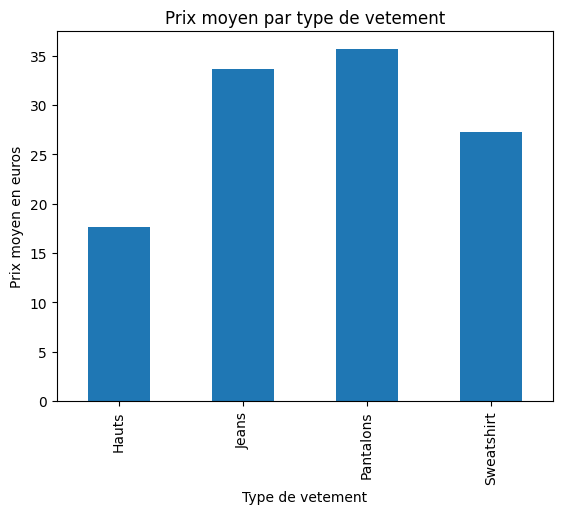

Product Type
Hauts         17.660169
Jeans         33.625379
Pantalons     35.672819
Sweatshirt    27.279830
Name: Price, dtype: float64


In [10]:
average_price_per_item_type = df.groupby('Product Type')['Price'].mean()
average_price_per_item_type.plot(kind='bar')
plt.title('Prix moyen par type de vetement')
plt.xlabel('Type de vetement')
plt.ylabel('Prix moyen en euros')
plt.show()
print(average_price_per_item_type)


In [11]:
explode_Material = df['Material'].explode()
unique_Material = explode_Material.unique()
print("Matériaux differents:",len(unique_Material))
print(unique_Material)
# list of Material (with repetition) to Series
series_mat = pd.Series(explode_Material)
mat_counts =series_mat.value_counts()
total_cat = mat_counts.sum()
frequences = mat_counts/total_cat


Matériaux differents: 33
[' Coton' ' Coton recyclé' ' Polyester' ' Polyester recyclé' ' Viscose'
 ' Élasthanne' ' Coton biologique' ' Copolyester' ' Polyuréthane'
 ' Circulose®' ' Élastomultiester' ' Lyocell' ' Lyocell Tencel™'
 ' Polyamide' ' Modal' ' Viscose LivaEco™' ' Viscose LENZING™ ECOVERO™'
 ' Polyamide recyclé' ' Soie' ' Laine' ' Lin' ' Acrylique' ' Mohair'
 ' Fibre métallisée' ' Autres fibres' ' Laine recyclée'
 " Polyester recyclé d'origine textile" ' Cachemire' ' Cuir'
 " Polytéréphtalate d'éthylène" ' Laine de yack' ' Acétate' ' Polystyrène']


In [12]:
df_mat_counts = pd.DataFrame(series_mat.value_counts())
df_mat_counts.reset_index(inplace=True)
total = df_mat_counts['count'].sum()
df_mat_counts

,Material,count
0,Coton,1245
1,Polyester,1201
2,Élasthanne,1108
3,Polyester recyclé,965
4,Coton recyclé,640
5,Viscose,504
6,Polyamide,356
7,Viscose LivaEco™,210
8,Lin,136
9,Polyamide recyclé,119


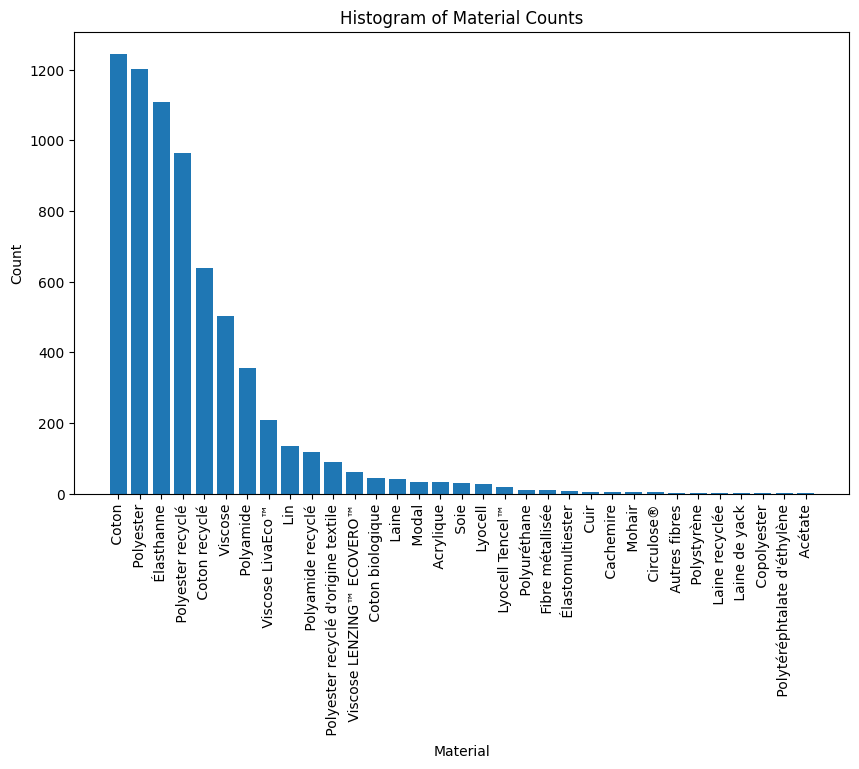

In [13]:
# histogramme
plt.figure(figsize=(10, 6))
plt.bar(df_mat_counts['Material'], df_mat_counts['count'])
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Histogram of Material Counts')
plt.xticks(rotation=90)
plt.show()


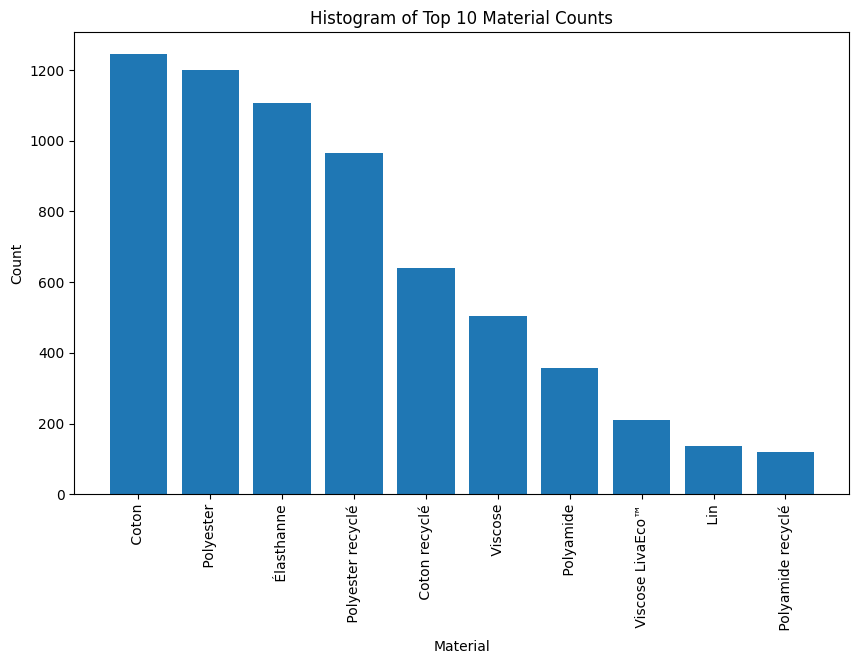

In [14]:
plt.figure(figsize=(10, 6))
plt.bar(df_mat_counts.head(10)['Material'], df_mat_counts.head(10)['count'])
plt.xlabel('Material')
plt.ylabel('Count')
plt.title('Histogram of Top 10 Material Counts')
plt.xticks(rotation=90)
plt.show()

Matrice de cooccurence des matériaux 

In [15]:
co_occ = pd.DataFrame(0,index=unique_Material,columns=unique_Material) #init matrix to 0
for cat_list in df['Material']:
    cat_list =  list(set(cat_list)) #set to remove duplicates
    for i in range(len(cat_list)):
        for j in range(i+1, len(cat_list)):
            co_occ.at[cat_list[i], cat_list[j]] += 1
            co_occ.at[cat_list[j], cat_list[i]] += 1
co_occ.head()

,Coton,Coton recyclé,Polyester,Polyester recyclé,Viscose,Élasthanne,Coton biologique,Copolyester,Polyuréthane,Circulose®,...,Fibre métallisée,Autres fibres,Laine recyclée,Polyester recyclé d'origine textile,Cachemire,Cuir,Polytéréphtalate d'éthylène,Laine de yack,Acétate,Polystyrène
Coton,0,640,501,442,76,481,42,1,0,4,...,1,1,0,7,1,1,0,0,0,3
Coton recyclé,640,0,299,356,15,267,10,1,0,4,...,0,1,0,1,0,0,0,0,0,3
Polyester,501,299,0,855,243,646,10,0,10,0,...,4,2,2,76,1,0,1,1,1,3
Polyester recyclé,442,356,855,0,164,559,7,0,0,4,...,1,2,2,57,0,0,0,0,0,3
Viscose,76,15,243,164,0,158,8,0,0,4,...,9,0,0,61,0,3,0,0,0,0


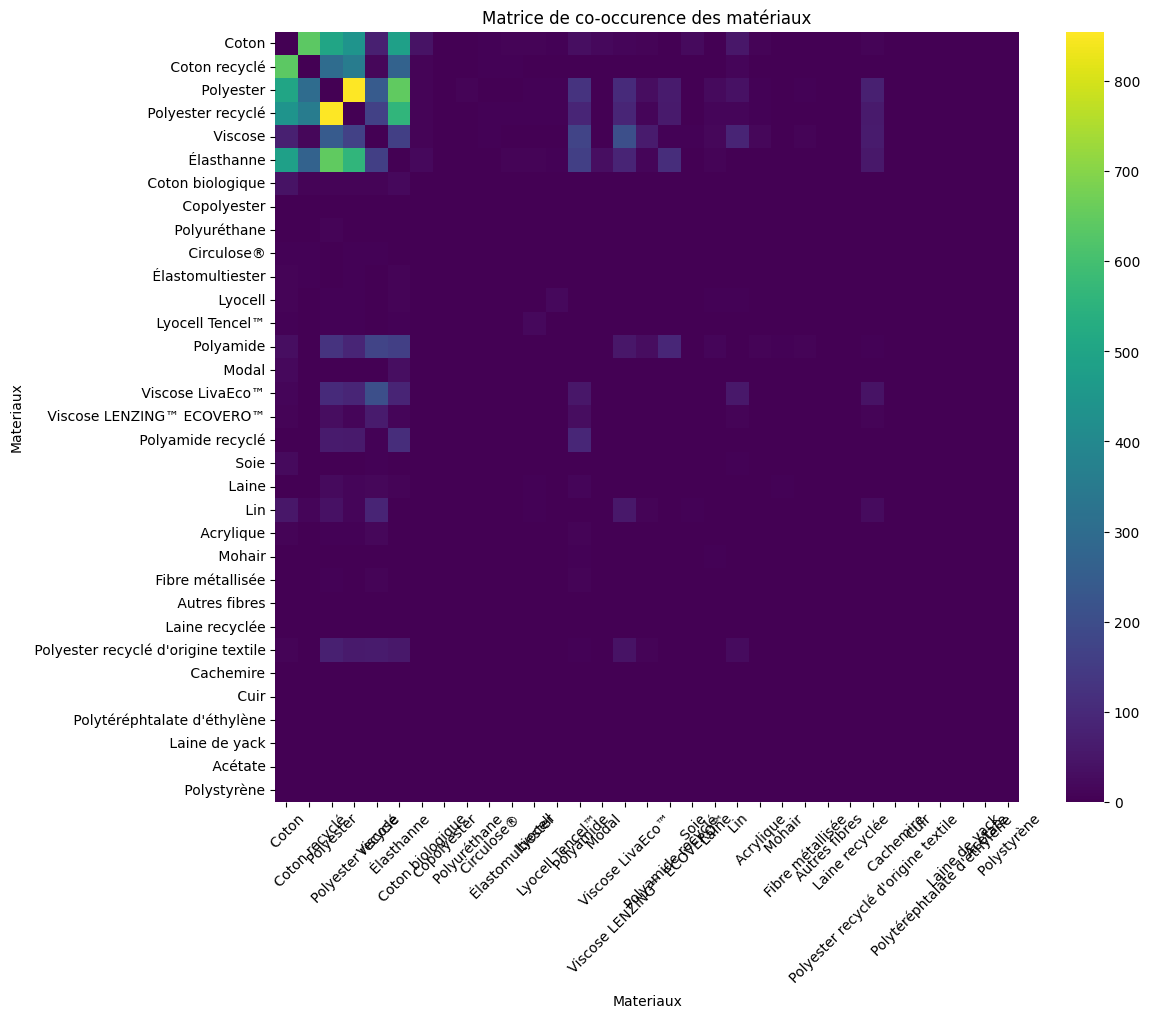

In [16]:
import seaborn as sns
plt.figure(figsize=(12, 10))
sns.heatmap(co_occ, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Materiaux")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux")
plt.show()

On voit que top10 co-occurent ensemble

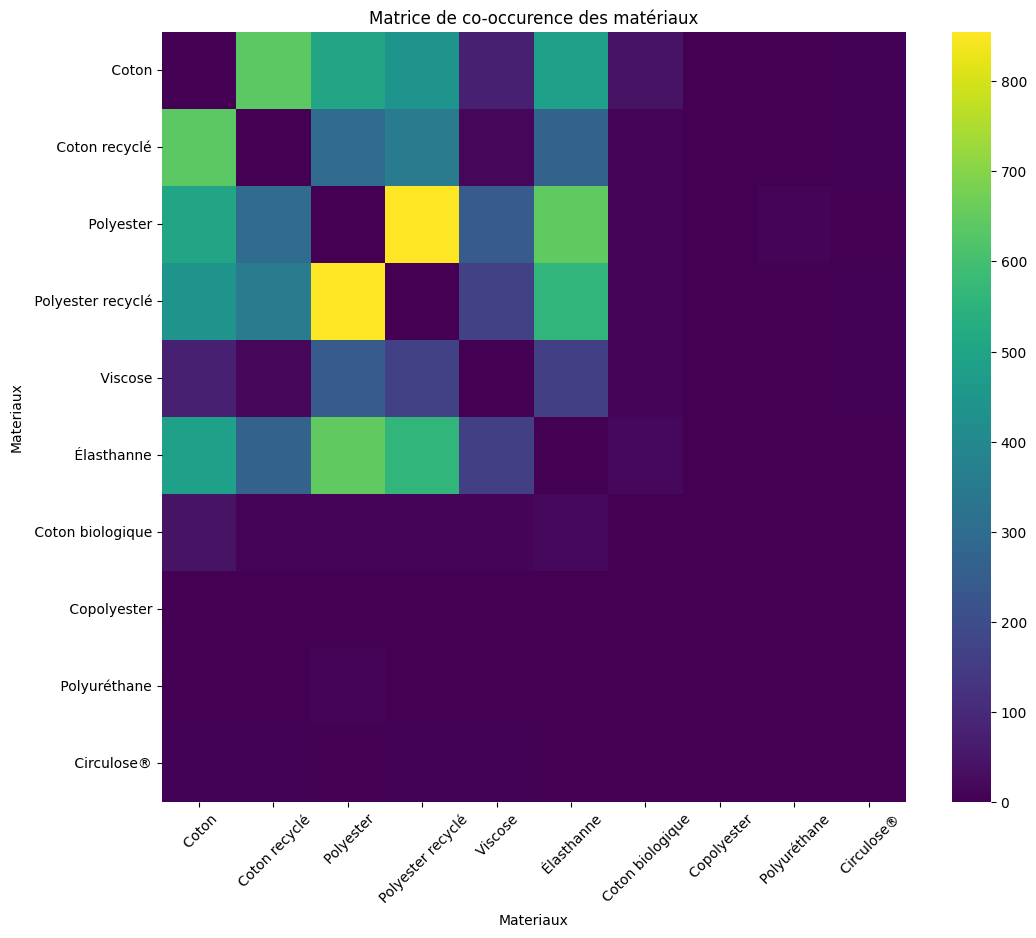

In [17]:
plt.figure(figsize=(12, 10))

sns.heatmap(co_occ.iloc[:10, :10], cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Materiaux")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux")
plt.show()

Cleanup et séparation des pays : 

In [18]:
df['Informations']

0                    ['Pays de fabrication\nBangladesh']
1      ['Pays d’origine du matériau\nChine', 'Pays de...
2                    ['Pays de fabrication\nBangladesh']
3      ['Teinture\nPakistan', 'Tissage\nPakistan', 'F...
4                                                     []
                             ...                        
171                       ['Pays de fabrication\nChine']
172                  ['Pays de fabrication\nBangladesh']
173                       ['Pays de fabrication\nChine']
174                  ['Pays de fabrication\nBangladesh']
175                       ['Pays de fabrication\nChine']
Name: Informations, Length: 2338, dtype: object

In [19]:
df['Informations'] = df['Informations'].apply(ast.literal_eval)

In [20]:
df['Informations'].head()

0                    [Pays de fabrication\nBangladesh]
1    [Pays d’origine du matériau\nChine, Pays de fa...
2                    [Pays de fabrication\nBangladesh]
3    [Teinture\nPakistan, Tissage\nPakistan, Fabric...
4                                                   []
Name: Informations, dtype: object

In [21]:
countries = df['Informations'].apply(lambda x: ', '.join([info.split('\n')[-1] for info in x]))
countries

0                        Bangladesh
1                      Chine, Chine
2                        Bangladesh
3      Pakistan, Pakistan, Pakistan
4                                  
                   ...             
171                           Chine
172                      Bangladesh
173                           Chine
174                      Bangladesh
175                           Chine
Name: Informations, Length: 2338, dtype: object

In [22]:

info_countries = {}
for _, row in df.iterrows():
    informations = row['Informations']
    for info in informations:
        if '\n' in info:
            type_info, countries = info.split('\n', 1)
            if type_info in info_countries:
                info_countries[type_info].add(countries)
            else:
                info_countries[type_info] = {countries}

info_countries

{'Pays de fabrication': {'Bangladesh',
  'Bangladesh\nBirmanie',
  'Bangladesh\nBirmanie\nChine',
  'Bangladesh\nCambodge\nBirmanie\nChine',
  'Bangladesh\nCambodge\nBirmanie\nVietnam\nChine',
  'Bangladesh\nChine',
  'Bangladesh\nChine\nTurquie',
  'Bangladesh\nInde',
  'Bangladesh\nInde\nBirmanie',
  'Bangladesh\nInde\nChine\nTurquie',
  'Bangladesh\nInde\nPakistan',
  'Bangladesh\nInde\nTurquie',
  'Bangladesh\nIndonésie',
  'Bangladesh\nIndonésie\nChine\nTurquie',
  'Bangladesh\nIndonésie\nInde\nTurquie\nEthiopie',
  'Bangladesh\nIndonésie\nMexique',
  'Bangladesh\nIndonésie\nTurquie',
  'Bangladesh\nMexique',
  'Bangladesh\nPakistan',
  'Bangladesh\nTurquie',
  'Birmanie',
  'Birmanie\nChine',
  'Birmanie\nChine\nTurquie',
  'Bulgaria',
  'Bulgaria\nBangladesh',
  'Bulgaria\nCambodge',
  'Bulgaria\nCambodge\nChine\nTurquie',
  'Bulgaria\nCambodge\nTurquie',
  'Cambodge',
  'Cambodge\nBirmanie',
  'Cambodge\nBirmanie\nChine',
  'Cambodge\nBirmanie\nChine\nTurquie',
  'Cambodge\nBir

In [23]:
info_countries = set()
pays_concernes = []
for _, row in df.iterrows():
    informations = row['Informations']
    pays = []
    for info in informations:
        if '\n' in info:
            res = info.split('\n')
            type_info = res.pop(0)
            info_countries.add(type_info)
            pays.append(res)
    pays_concernes.append(pays)
info_countries

{'Fabrication',
 'Impression',
 'Pays de fabrication',
 'Pays d’origine du matériau',
 'Teinture',
 'Tissage'}

In [24]:
df_copy = df.copy()
df_copy['Pays concernés'] = pays_concernes #tous les pays concernés au cours de fabrication

for info in info_countries:
    infos = []
    for _, row in df_copy.iterrows():
        informations = row['Informations']
        added = False
        for i in informations:
            res = i.split('\n')
            if len(res) <= 1:
                continue
            type_info = res.pop(0)
            if type_info == info:
                infos.append(res)
                added=True
        if not added:
            infos.append([])

    df_copy[info] = infos


df_copy.head(10)

,Product Type,Product Name,Price,Material,Link,Informations,Pays concernés,Teinture,Tissage,Fabrication,Pays d’origine du matériau,Impression,Pays de fabrication
0,Jeans,Pantalon cargo en denim,29.99,"[ Coton, Coton recyclé]",https://www2.hm.com/fr_fr/productpage.11989210...,[Pays de fabrication\nBangladesh],[[Bangladesh]],[],[],[],[],[],[Bangladesh]
1,Jeans,Ultra High Ankle Jeggings,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11524570...,"[Pays d’origine du matériau\nChine, Pays de fa...","[[Chine], [Chine]]",[],[],[],[Chine],[],[Chine]
2,Jeans,Wide High Jeans,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.08718890...,[Pays de fabrication\nBangladesh],[[Bangladesh]],[],[],[],[],[],[Bangladesh]
3,Jeans,Flared Low Jeans,25.99,"[ Coton, Coton recyclé, Polyester, Élasthanne]",https://www2.hm.com/fr_fr/productpage.11834980...,"[Teinture\nPakistan, Tissage\nPakistan, Fabric...","[[Pakistan], [Pakistan], [Pakistan]]",[Pakistan],[Pakistan],[Pakistan],[],[],[]
4,Jeans,Skinny Regular Ankle Jeans,39.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11991810...,[],[],[],[],[],[],[],[]
5,Jeans,Wide High Cropped Jeans,25.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11991910...,[Pays de fabrication\nBangladesh],[[Bangladesh]],[],[],[],[],[],[Bangladesh]
6,Jeans,Curvy Fit Slim High Jeans,35.99,"[ Coton, Coton recyclé, Polyester, Élasthanne]",https://www2.hm.com/fr_fr/productpage.12139460...,[Pays de fabrication\nBangladesh],[[Bangladesh]],[],[],[],[],[],[Bangladesh]
7,Jeans,Ultra High Ankle Jeggings,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11524570...,[Pays de fabrication\nInde\nVietnam\nChine],"[[Inde, Vietnam, Chine]]",[],[],[],[],[],"[Inde, Vietnam, Chine]"
8,Jeans,Slim Straight High Ankle Jeans,29.99,"[ Coton, Coton recyclé, Polyester recyclé, ...",https://www2.hm.com/fr_fr/productpage.12145700...,[Pays de fabrication\nBangladesh],[[Bangladesh]],[],[],[],[],[],[Bangladesh]
9,Jeans,Slim Regular Jeans,25.99,"[ Coton, Coton recyclé, Élasthanne]",https://www2.hm.com/fr_fr/productpage.11372690...,[Pays de fabrication\nPakistan],[[Pakistan]],[],[],[],[],[],[Pakistan]


In [25]:
df_copy['Pays concernés'] = df_copy['Pays concernés'].apply(lambda x: [item for sublist in x for item in sublist])


In [26]:
df_copy.head()

,Product Type,Product Name,Price,Material,Link,Informations,Pays concernés,Teinture,Tissage,Fabrication,Pays d’origine du matériau,Impression,Pays de fabrication
0,Jeans,Pantalon cargo en denim,29.99,"[ Coton, Coton recyclé]",https://www2.hm.com/fr_fr/productpage.11989210...,[Pays de fabrication\nBangladesh],[Bangladesh],[],[],[],[],[],[Bangladesh]
1,Jeans,Ultra High Ankle Jeggings,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11524570...,"[Pays d’origine du matériau\nChine, Pays de fa...","[Chine, Chine]",[],[],[],[Chine],[],[Chine]
2,Jeans,Wide High Jeans,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.08718890...,[Pays de fabrication\nBangladesh],[Bangladesh],[],[],[],[],[],[Bangladesh]
3,Jeans,Flared Low Jeans,25.99,"[ Coton, Coton recyclé, Polyester, Élasthanne]",https://www2.hm.com/fr_fr/productpage.11834980...,"[Teinture\nPakistan, Tissage\nPakistan, Fabric...","[Pakistan, Pakistan, Pakistan]",[Pakistan],[Pakistan],[Pakistan],[],[],[]
4,Jeans,Skinny Regular Ankle Jeans,39.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11991810...,[],[],[],[],[],[],[],[]


In [43]:
#supprimer les lignes sans aucune information sur les pays
df_copy = df_copy[df_copy['Pays concernés'].apply(lambda x: len(x) > 0)]
df_copy.head()


,Product Type,Product Name,Price,Material,Link,Informations,Pays concernés,Teinture,Tissage,Fabrication,Pays d’origine du matériau,Impression,Pays de fabrication
0,Jeans,Pantalon cargo en denim,29.99,"[ Coton, Coton recyclé]",https://www2.hm.com/fr_fr/productpage.11989210...,[Pays de fabrication\nBangladesh],[Bangladesh],[],[],[],[],[],[Bangladesh]
1,Jeans,Ultra High Ankle Jeggings,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11524570...,"[Pays d’origine du matériau\nChine, Pays de fa...","[Chine, Chine]",[],[],[],[Chine],[],[Chine]
2,Jeans,Wide High Jeans,29.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.08718890...,[Pays de fabrication\nBangladesh],[Bangladesh],[],[],[],[],[],[Bangladesh]
3,Jeans,Flared Low Jeans,25.99,"[ Coton, Coton recyclé, Polyester, Élasthanne]",https://www2.hm.com/fr_fr/productpage.11834980...,"[Teinture\nPakistan, Tissage\nPakistan, Fabric...","[Pakistan, Pakistan, Pakistan]",[Pakistan],[Pakistan],[Pakistan],[],[],[]
5,Jeans,Wide High Cropped Jeans,25.99,"[ Coton, Coton recyclé, Polyester, Polyeste...",https://www2.hm.com/fr_fr/productpage.11991910...,[Pays de fabrication\nBangladesh],[Bangladesh],[],[],[],[],[],[Bangladesh]


Analyse des pays

In [28]:
explode_pays = df_copy['Pays concernés'].explode()
unique_pays = explode_pays.unique()
print("Matériaux differents:",len(unique_pays))
print(unique_pays)
# list of pays (with repetition) to Series
series_mat = pd.Series(explode_pays)
mat_counts =series_mat.value_counts()
total_cat = mat_counts.sum()
frequences = mat_counts/total_cat

Matériaux differents: 18
['Bangladesh' 'Chine' 'Pakistan' 'Inde' 'Vietnam' 'Turquie' 'Birmanie'
 'Cambodge' 'Indonésie' 'Maroc' 'Bulgaria' 'Guatemala' 'Kenya' 'Honduras'
 'Roumanie' 'Mexique' 'Ethiopie' 'Italy']


On n'a que 18 pays concernés

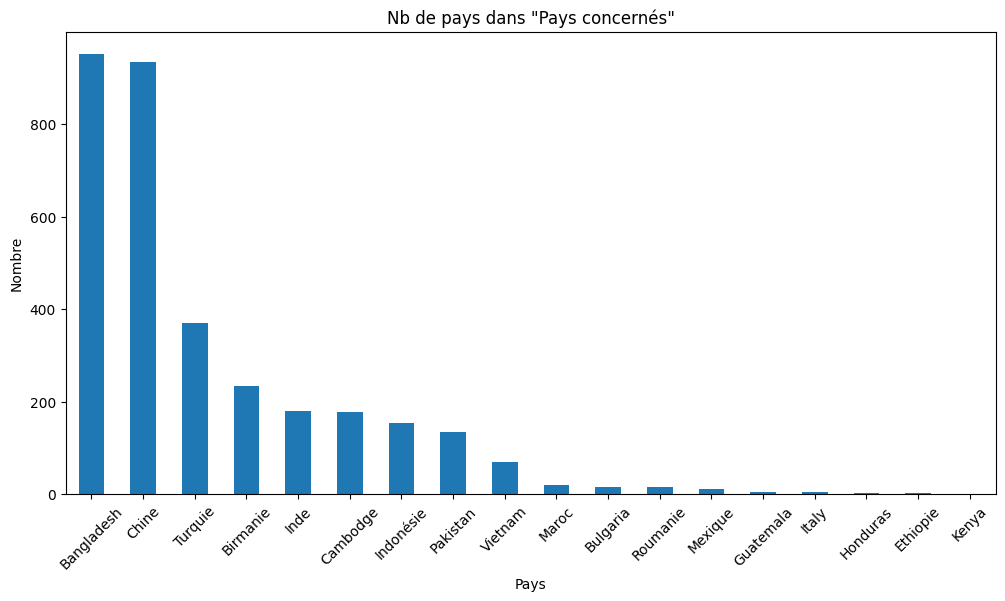

In [29]:
country_counts = df_copy['Pays concernés'].explode().value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Nombre')
plt.title('Nb de pays dans "Pays concernés"')
plt.xticks(rotation=45)
plt.show()


In [30]:
prices = {country: [0, 0] for country in unique_pays} 
for _, row in df_copy.iterrows():
    price = row['Price']  
    for country in row['Pays concernés']:
        prices[country][0] += price
        prices[country][1] += 1
average_prices = {country: total / count for country, (total, count) in prices.items()}
print(average_prices)

{'Bangladesh': 20.41586750788649, 'Chine': 27.7196256684495, 'Pakistan': 44.885970149253616, 'Inde': 14.492793296089355, 'Vietnam': 20.207391304347833, 'Turquie': 21.944135135134978, 'Birmanie': 18.88743589743581, 'Cambodge': 14.865706214689245, 'Indonésie': 19.44098039215681, 'Maroc': 32.24, 'Bulgaria': 10.615, 'Guatemala': 7.99, 'Kenya': 19.99, 'Honduras': 7.99, 'Roumanie': 122.39933333333333, 'Mexique': 14.189999999999998, 'Ethiopie': 7.99, 'Italy': 124.0}


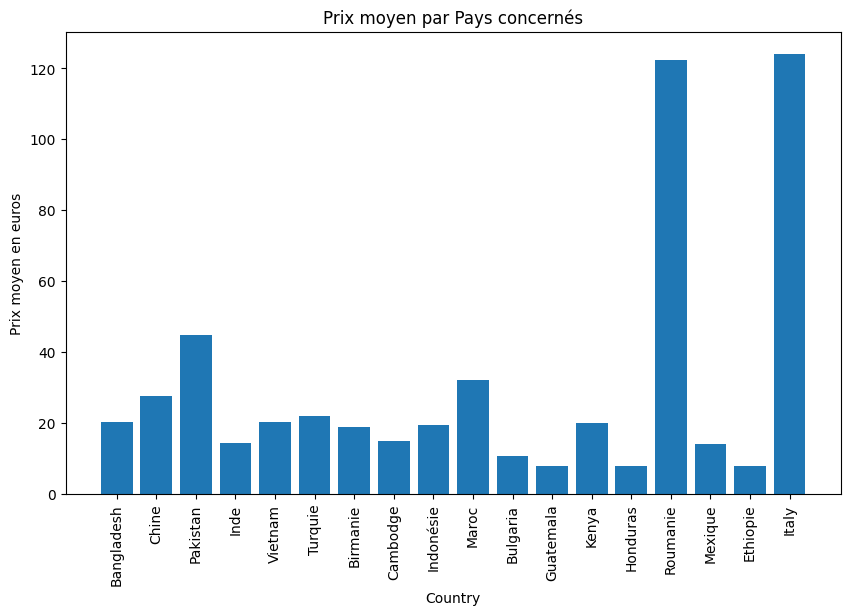

In [31]:
pays = list(average_prices.keys())
prices = list(average_prices.values())
plt.figure(figsize=(10, 6))
plt.bar(pays, prices)
plt.xlabel('Country')
plt.ylabel('Prix moyen en euros')
plt.title('Prix moyen par Pays concernés')
plt.xticks(rotation=90)
plt.show()


Observation : le prix varie selon le pays de fabrication. En même temps, nous n'avons pas assez d'exemplaire pour italie.

In [32]:
#matrice ce co-occurence des pays selon matériaux
from collections import defaultdict

cooccurrence = defaultdict(lambda: defaultdict(int))
for _, row in df_copy.iterrows():
    countries = row['Pays concernés']  
    materials = row['Material'] 
    for country in countries:
        for material in materials:
            cooccurrence[country][material] += 1
cooccurrence = pd.DataFrame(cooccurrence).fillna(0)
cooccurrence.head()

,Bangladesh,Chine,Pakistan,Inde,Vietnam,Turquie,Birmanie,Cambodge,Indonésie,Maroc,Bulgaria,Guatemala,Kenya,Honduras,Roumanie,Mexique,Ethiopie,Italy
Coton,815.0,332.0,130.0,166.0,21.0,160.0,61.0,39.0,52.0,9.0,4.0,4.0,1.0,2.0,4.0,10.0,2.0,2.0
Coton recyclé,488.0,119.0,127.0,106.0,18.0,77.0,16.0,8.0,36.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
Polyester,402.0,537.0,45.0,25.0,50.0,188.0,122.0,109.0,122.0,8.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
Polyester recyclé,352.0,439.0,78.0,31.0,47.0,92.0,101.0,93.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Élasthanne,428.0,440.0,70.0,100.0,62.0,222.0,106.0,138.0,80.0,0.0,11.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


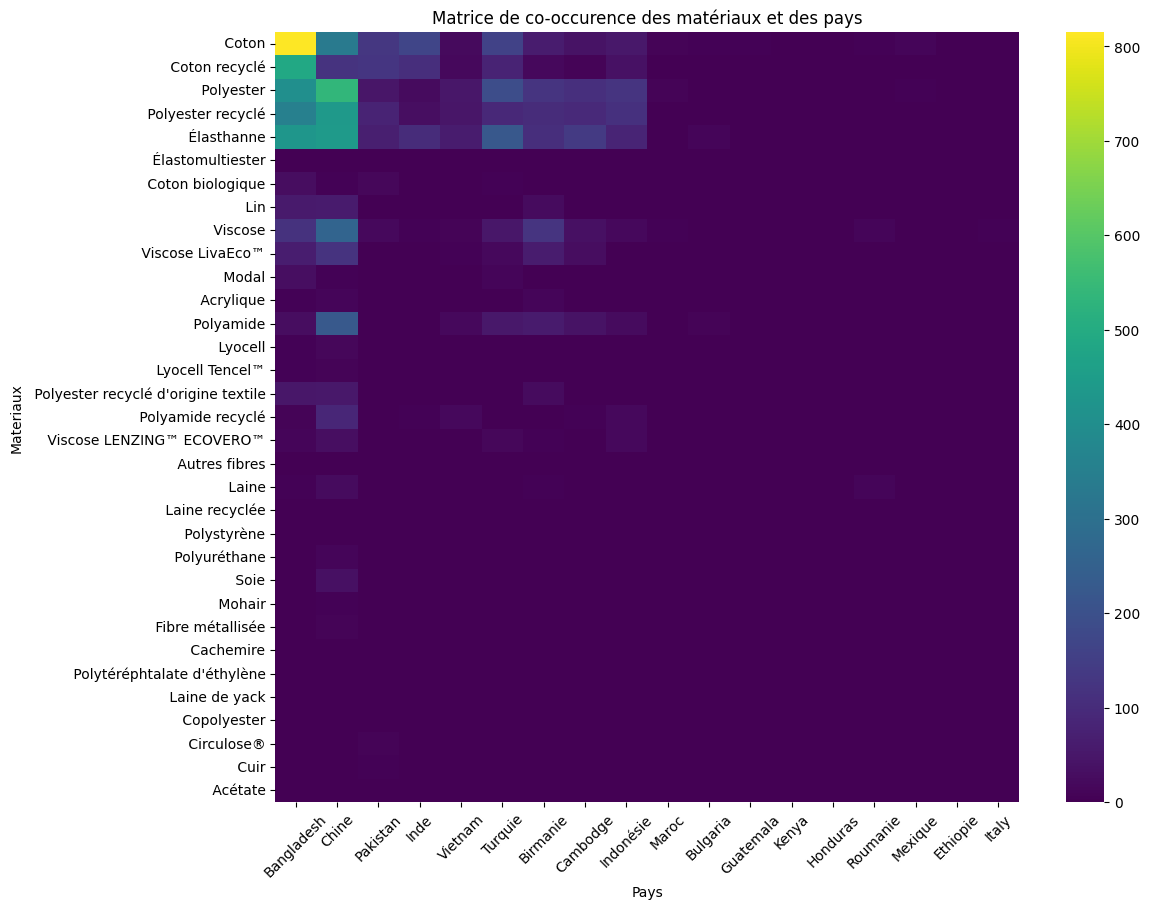

In [33]:
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Pays")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux et des pays")
plt.show()

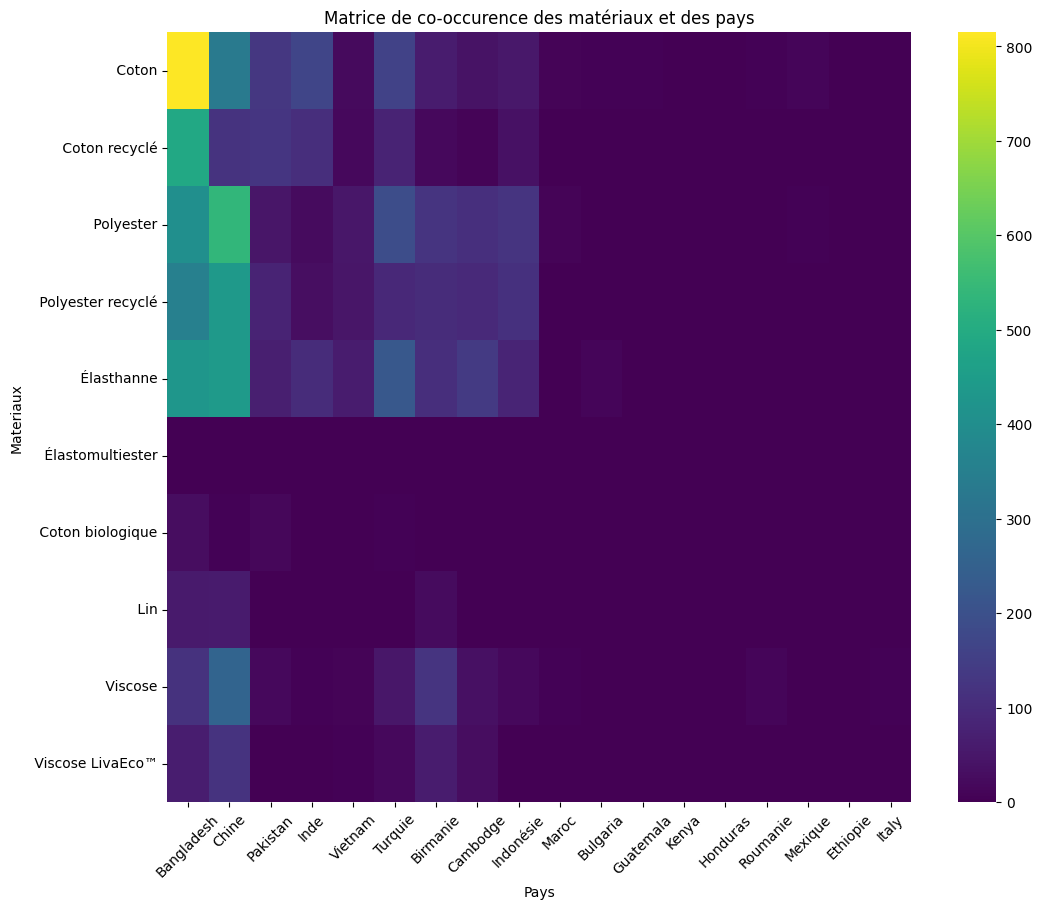

In [44]:
#co-occ entre les matériaux les plus utilisés
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence.iloc[:10,:], cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Pays")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux et des pays")
plt.show()

Concentrons sur pays de fabrication

Plus d'analyse possible sur les détails d'info : pays de fabrication,teinture etc.

Matériaux differents: 17
['Bangladesh' 'Chine' nan 'Inde' 'Vietnam' 'Pakistan' 'Turquie' 'Birmanie'
 'Cambodge' 'Indonésie' 'Maroc' 'Guatemala' 'Kenya' 'Bulgaria' 'Roumanie'
 'Mexique' 'Ethiopie']


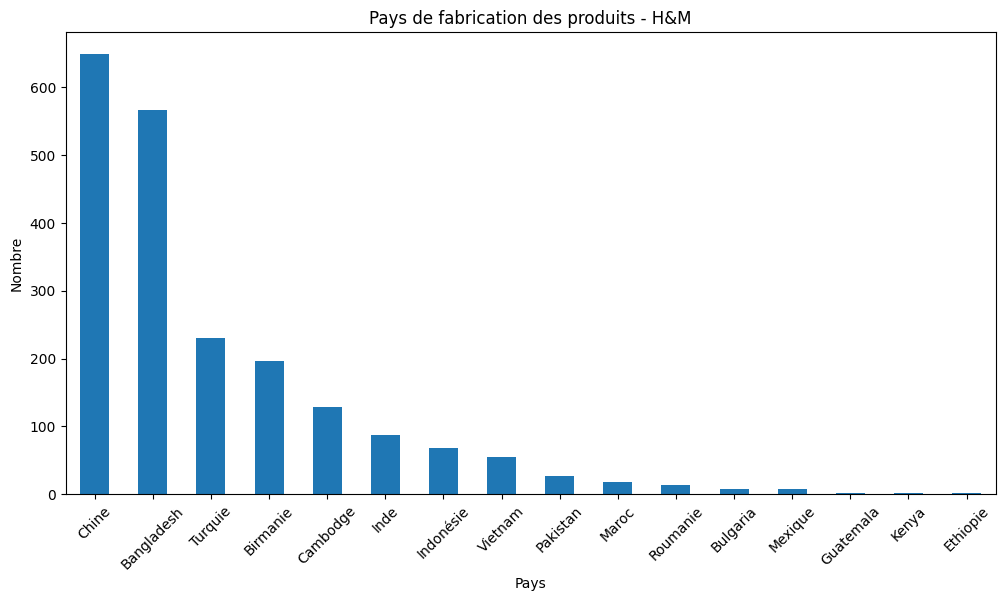

{'Bangladesh': 22.566719576719386, 'Chine': 29.40787365177198, 'Inde': 18.369310344827593, 'Vietnam': 19.971818181818186, 'Pakistan': 62.183461538461536, 'Turquie': 24.390086956521614, 'Birmanie': 19.223502538070992, 'Cambodge': 15.154062500000007, 'Indonésie': 20.857647058823535, 'Maroc': 31.37888888888889, 'Guatemala': 7.99, 'Kenya': 19.99, 'Bulgaria': 12.239999999999998, 'Roumanie': 121.38384615384615, 'Mexique': 15.418571428571427, 'Ethiopie': 7.99}


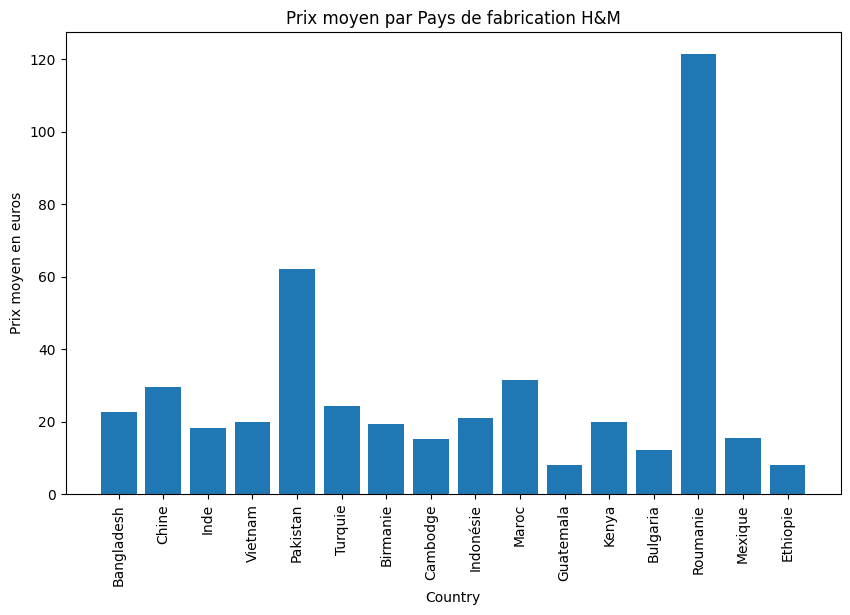

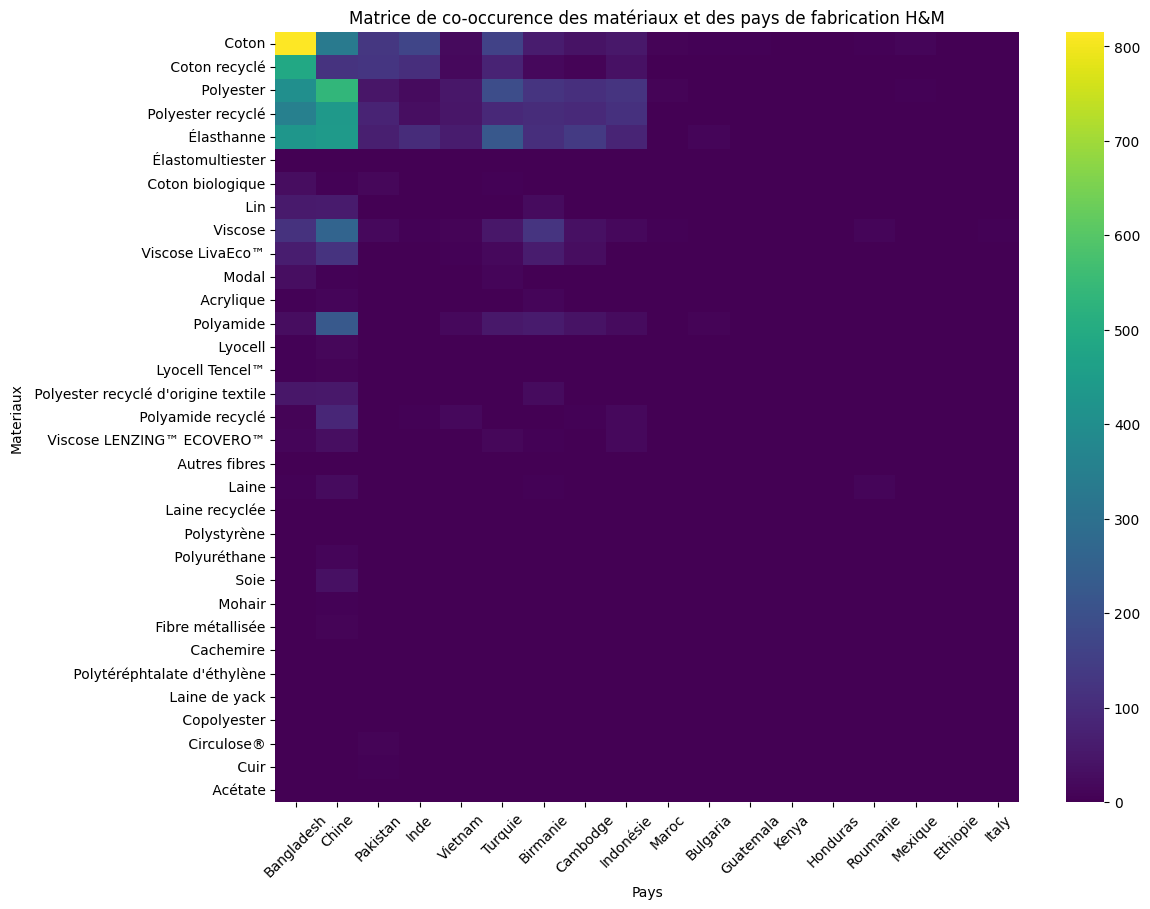

In [48]:
explode_pays = df_copy['Pays de fabrication'].explode()
unique_pays = explode_pays.unique()
print("Matériaux differents:",len(unique_pays))
print(unique_pays)
# list of pays (with repetition) to Series
series_mat = pd.Series(explode_pays)
mat_counts =series_mat.value_counts()
total_cat = mat_counts.sum()
frequences = mat_counts/total_cat
country_counts = df_copy['Pays de fabrication'].explode().value_counts()
plt.figure(figsize=(12, 6))
country_counts.plot(kind='bar')
plt.xlabel('Pays')
plt.ylabel('Nombre')
plt.title('Pays de fabrication des produits - H&M')
plt.xticks(rotation=45)
plt.show()

prices = {country: [0, 0] for country in unique_pays} 
for _, row in df_copy.iterrows():
    price = row['Price']  
    for country in row['Pays de fabrication']:
        prices[country][0] += price
        prices[country][1] += 1

average_prices = {country: total / count for country, (total, count) in prices.items() if count>0}
print(average_prices)
pays = list(average_prices.keys())
prices = list(average_prices.values())
plt.figure(figsize=(10, 6))
plt.bar(pays, prices)
plt.xlabel('Country')
plt.ylabel('Prix moyen en euros')
plt.title('Prix moyen par Pays de fabrication H&M')
plt.xticks(rotation=90)
plt.show()

cooccurrence = defaultdict(lambda: defaultdict(int))
for _, row in df_copy.iterrows():
    countries = row['Pays concernés']  
    materials = row['Material'] 
    for country in countries:
        for material in materials:
            cooccurrence[country][material] += 1
cooccurrence = pd.DataFrame(cooccurrence).fillna(0)
plt.figure(figsize=(12, 10))
sns.heatmap(cooccurrence, cmap='viridis')
plt.xticks(rotation=45)
plt.xlabel("Pays")
plt.ylabel("Materiaux")
plt.title("Matrice de co-occurence des matériaux et des pays de fabrication H&M")
plt.show()

In [50]:
cooccurrence

,Bangladesh,Chine,Pakistan,Inde,Vietnam,Turquie,Birmanie,Cambodge,Indonésie,Maroc,Bulgaria,Guatemala,Kenya,Honduras,Roumanie,Mexique,Ethiopie,Italy
Coton,815.0,332.0,130.0,166.0,21.0,160.0,61.0,39.0,52.0,9.0,4.0,4.0,1.0,2.0,4.0,10.0,2.0,2.0
Coton recyclé,488.0,119.0,127.0,106.0,18.0,77.0,16.0,8.0,36.0,0.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,0.0
Polyester,402.0,537.0,45.0,25.0,50.0,188.0,122.0,109.0,122.0,8.0,0.0,0.0,0.0,0.0,3.0,6.0,0.0,1.0
Polyester recyclé,352.0,439.0,78.0,31.0,47.0,92.0,101.0,93.0,113.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
Élasthanne,428.0,440.0,70.0,100.0,62.0,222.0,106.0,138.0,80.0,0.0,11.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
Élastomultiester,2.0,0.0,3.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Coton biologique,28.0,6.0,15.0,1.0,1.0,5.0,1.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
Lin,56.0,58.0,0.0,0.0,2.0,2.0,23.0,0.0,3.0,2.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0
Viscose,117.0,259.0,18.0,6.0,7.0,48.0,122.0,35.0,19.0,4.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,4.0
Viscose LivaEco™,64.0,118.0,0.0,3.0,4.0,17.0,62.0,27.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [35]:
df_copy.to_csv('../data/fastfashion_clean.csv', index=False)

# saving with pickle too
df_copy.to_pickle('../data/fastfashion_clean.pkl')

In [36]:
df_copy.shape

(2250, 13)

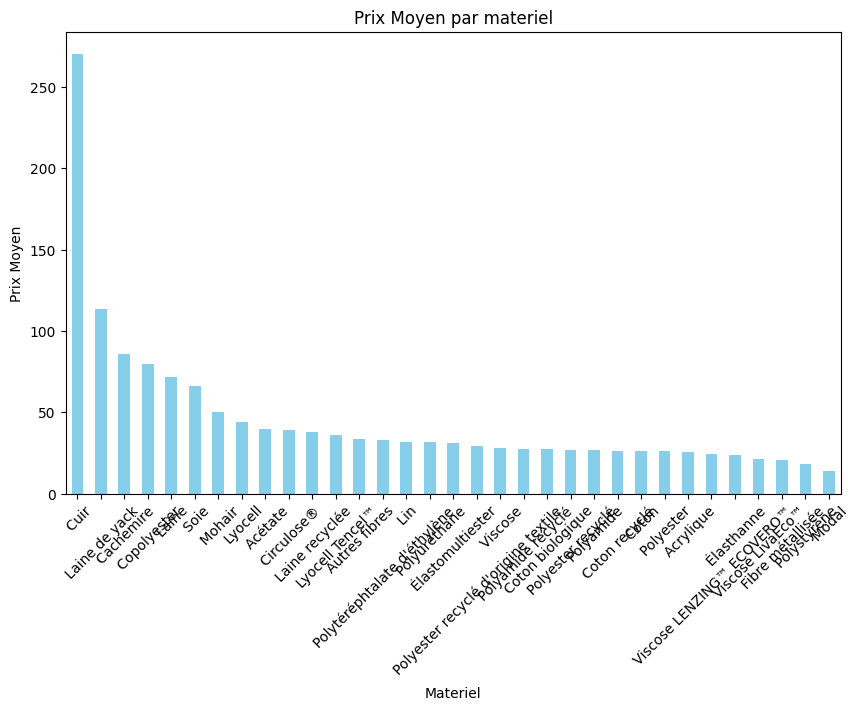

In [49]:
tmp_hm = df_copy.copy()
exploded_df = pd.DataFrame(tmp_hm['Material'].explode())

merged_df = pd.merge(exploded_df, tmp_hm, left_index=True, right_index=True)

merged_df.rename(columns={0: 'Material'}, inplace=True)
merged_df.drop(columns=['Material_x'], inplace=True)

exploded_df = merged_df.explode('Material_y')

material_avg_price = exploded_df.groupby('Material_y')['Price'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
material_avg_price.plot(kind='bar', color='skyblue')
plt.title('Prix Moyen par materiel')
plt.xlabel('Materiel')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=45)
plt.show()

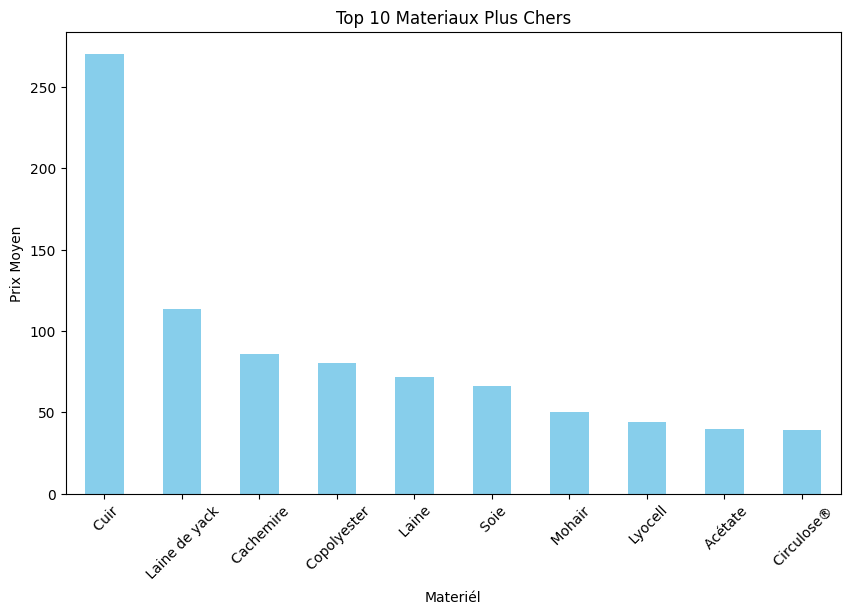

In [38]:
top_materials = material_avg_price.head(10)

# top 10
plt.figure(figsize=(10, 6))
top_materials.plot(kind='bar', color='skyblue')
plt.title('Top 10 Materiaux Plus Chers')
plt.xlabel('Materiél')
plt.ylabel('Prix Moyen')
plt.xticks(rotation=45)
plt.show()